<a href="https://colab.research.google.com/github/BettyBett/CODSOFT/blob/main/IMDB_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MOVIE RATING PREDICTION

In [1]:
# Import all the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
# display the first 5 rows of the data
data = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# display the last 5 rows
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [4]:
# check the information of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


From checking the information of the columns we discover a few things:
1. The data has 10 columns and 15509 rows
2. Most the columns have null values

In [5]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


#### Data cleaning

In [6]:
# Check for duplicated rows
data.duplicated().sum()

6

In [7]:
# drop the duplicated rows keeping only the first instance
data = data.drop_duplicates(keep = 'first')

In [8]:
# confirm the duplicated values have been dropped
data.duplicated().sum()

0

In [9]:
# check for missing values
data.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [10]:
# percentage of the missing values in each column
def missing(data):
  cells = data['Name'].size -1
  null_cells = data.isna().sum()
  perc = ((null_cells / cells) * 100 ).round(2)
  return perc

percentage = missing(data)
percentage

Name         0.00
Year         3.40
Duration    53.31
Genre       12.10
Rating      48.92
Votes       48.92
Director     3.38
Actor 1     10.42
Actor 2     15.36
Actor 3     20.26
dtype: float64

Drop all the rows where we have missing values of the rating column.

In [11]:
# drop missing values in the rating column
data.dropna(subset = ['Rating'], inplace=True)
data.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [12]:
# percentage of the missing data in each column
def missing(data):
  cells = data['Name'].size -1
  null_cells = data.isna().sum()
  perc = ((null_cells / cells) * 100 ).round(2)
  return perc

percentage = missing(data)
percentage

Name         0.00
Year         0.00
Duration    26.12
Genre        1.29
Rating       0.00
Votes        0.00
Director     0.06
Actor 1      1.58
Actor 2      2.53
Actor 3      3.69
dtype: float64

In [13]:
# drop rows with more than 2 null values
threshold = 2
df = data.dropna(thresh=data.shape[1] - threshold + 1)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [14]:
df.shape

(7633, 10)

In [15]:
df.isna().sum()

Name           0
Year           0
Duration    1899
Genre         29
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3       46
dtype: int64

In [16]:
# drop all the rows with missing values
df.dropna(subset = ['Genre','Actor 3','Duration'],inplace=True)
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [17]:
# make all the columns that are numerical to be integers
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)
df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '').astype(int)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Rating'] = df['Rating'].astype(int)

In [18]:
df_votes = df.sort_values(by = 'Votes', ascending = False)
df_rate = df.sort_values(by = 'Rating', ascending = False)

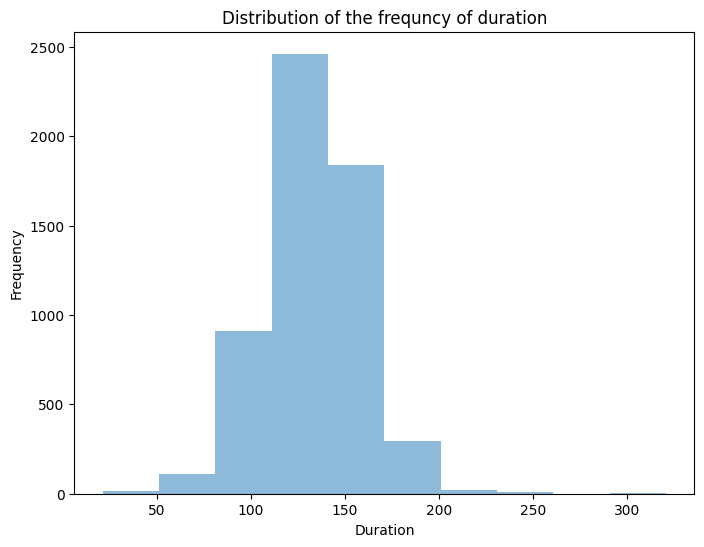

In [19]:
plt.figure(figsize=(8,6))

plt.hist(df['Duration'] , alpha=0.5);
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of the frequncy of duration');

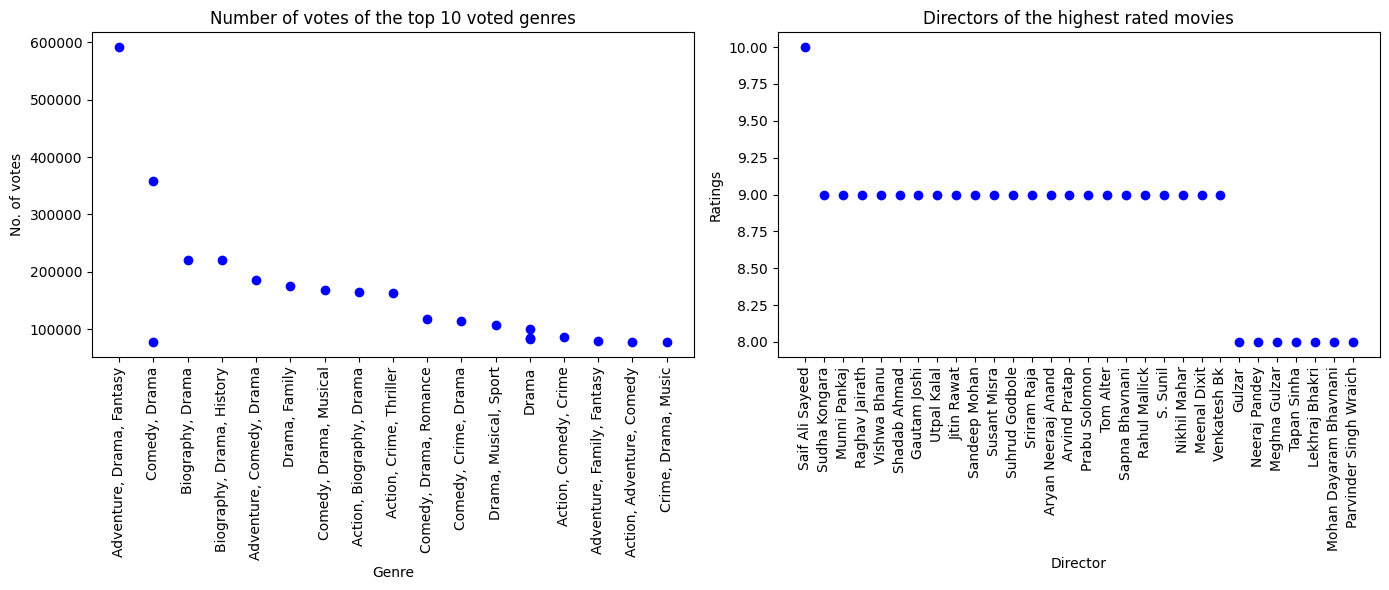

In [20]:
v_head = df_votes.head(20)
r_head = df_rate.head(30)
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.scatter(v_head['Genre'], v_head['Votes'], color='blue')
plt.xlabel('Genre')
plt.ylabel('No. of votes')
plt.title('Number of votes of the top 10 voted genres')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.scatter(r_head['Director'], r_head['Rating'], color='blue')
plt.xlabel('Director')
plt.ylabel('Ratings')
plt.title('Directors of the highest rated movies')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


#### Feature Engineering

In [22]:
#  retain clumns that will be useful when modeling
 dat = df.drop(['Name', 'Genre', 'Director','Actor 1', 'Actor 2', 'Actor 3'], axis = 1)
 dat.head()

,Year,Duration,Rating,Votes
1,2019,109,7,8
3,2019,110,4,35
5,1997,147,4,827
6,2005,142,7,1086
8,2012,82,5,326


In [23]:
# confirm that the data type is integers
dat.dtypes

Year        int64
Duration    int64
Rating      int64
Votes       int64
dtype: object

In [24]:
X = dat.drop('Rating', axis=1)
y = dat['Rating']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Squared Error: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
predictions = model.predict(X_test_scaled)

Epoch 1/100
114/114 [==============================] - 1s 5ms/step - loss: 12.2762 - mae: 2.9342 - val_loss: 3.5415 - val_mae: 1.4757
Epoch 2/100
114/114 [==============================] - 0s 3ms/step - loss: 3.4783 - mae: 1.3679 - val_loss: 2.5828 - val_mae: 1.2835
Epoch 3/100
114/114 [==============================] - 0s 3ms/step - loss: 2.6442 - mae: 1.2324 - val_loss: 2.1717 - val_mae: 1.1902
Epoch 4/100
114/114 [==============================] - 0s 3ms/step - loss: 2.2975 - mae: 1.1570 - val_loss: 1.9388 - val_mae: 1.1236
Epoch 5/100
114/114 [==============================] - 0s 3ms/step - loss: 2.0550 - mae: 1.1141 - val_loss: 1.8057 - val_mae: 1.0804
Epoch 6/100
114/114 [==============================] - 0s 3ms/step - loss: 1.9216 - mae: 1.0739 - val_loss: 1.7229 - val_mae: 1.0452
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 1.8097 - mae: 1.0486 - val_loss: 1.6542 - val_mae: 1.0256
Epoch 8/100
114/114 [==============================] - 0s 2ms/step -

In [28]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1.60
Mean Absolute Error: 0.95


### Model Deployment

In [32]:
new = pd.DataFrame({'Year': [2008], 'Duration': [98], 'Votes': [387],})

y = X['Year'].mean().round(2)
v = X['Votes'].mean().round(2)
d = X['Duration'].mean().round(2)
y_s = X['Year'].std().round(2)
v_s = X['Votes'].std().round(2)
d_s = X['Duration'].std().round(2)
mean = [y, v, d]
std = [y_s, v_s, d_s]

new['Year'] = (new['Year'] - mean[0]) / std[0]
new['Votes'] = (new['Votes'] - mean[1]) / std[1]
new['Duration'] = (new['Duration'] - mean[2]) / std[2]

# Make predictions
predicted_rating = model.predict(new)
predicted_rating[0]

4.99